<b> Assignment 02</b>
</br> </br>
<b> Name : </b> Yatharth Thakare </br>
<b> PRN no : </b> 12111403 </br>
<b> Roll no : </b> AI C </br>
<b> Subject : </b> SI </br>


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("manufacturing.csv")
df.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


In [ ]:
df.isnull().sum()

Temperature (°C)                  0
Pressure (kPa)                    0
Temperature x Pressure            0
Material Fusion Metric            0
Material Transformation Metric    0
Quality Rating                    0
dtype: int64

In [ ]:
df.corr()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
Temperature (°C),1.000000,-0.024754,0.571743,0.974901,0.971210,-0.461279
Pressure (kPa),-0.024754,1.000000,0.773572,0.151095,-0.022862,0.013129
Temperature x Pressure,0.571743,0.773572,1.000000,0.694733,0.555579,-0.258474
Material Fusion Metric,0.974901,0.151095,0.694733,1.000000,0.976708,-0.511972
Material Transformation Metric,0.971210,-0.022862,0.555579,0.976708,1.000000,-0.575756
Quality Rating,-0.461279,0.013129,-0.258474,-0.511972,-0.575756,1.000000


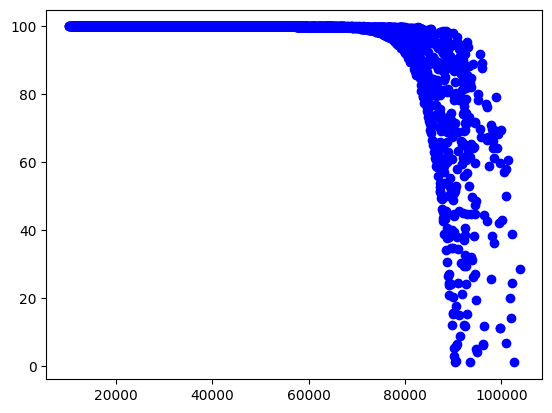

In [ ]:
plt.scatter(df['Material Fusion Metric'],df['Quality Rating'],  color='blue')

In [ ]:
X = np.array(df['Material Fusion Metric'])
y = np.array(df['Quality Rating'])

In [ ]:
X = X.reshape(-1, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [ ]:
Lmodel = LinearRegression()
Lmodel.fit(X,y)

LinearRegression()

In [ ]:
Lpreds = Lmodel.predict(X)

In [ ]:
mean_squared_error(y,Lpreds) **0.5

11.158974684716515

##Polynomial

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
print(X_poly)
lin2 = LinearRegression()
lin2.fit(X_poly,y)

[[1.00000000e+00 4.45222171e+04 1.98222781e+09]
 [1.00000000e+00 6.30207650e+04 3.97161682e+09]
 [1.00000000e+00 4.91259502e+04 2.41335899e+09]
 ...
 [1.00000000e+00 6.26576910e+04 3.92598624e+09]
 [1.00000000e+00 5.71959855e+04 3.27138076e+09]
 [1.00000000e+00 4.10923929e+04 1.68858475e+09]]


LinearRegression()

In [ ]:
Ppreds = lin2.predict(X_poly)

In [ ]:
mean_squared_error(y,Ppreds)**0.5

9.032703968165075

Text(0.5, 1.0, 'Linear Regression')

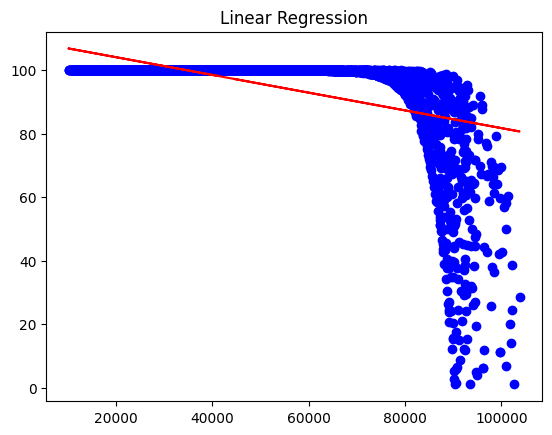

In [ ]:
plt.scatter(X,y,color='blue')
plt.plot(X, Lpreds, color = 'red')
plt.title('Linear Regression')

In [ ]:
X.shape

(3957, 1)

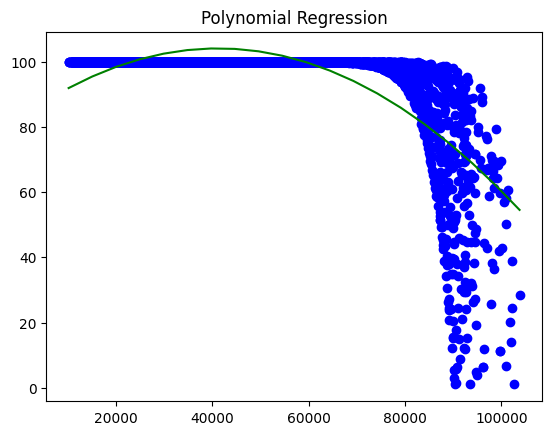

In [ ]:
plt.scatter(X,y,color='blue')
plt.title('Polynomial Regression')
# Plot the regression curve
X_range = np.linspace(X.min(), X.max(), 20).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = lin2.predict(X_range_poly)
plt.plot(X_range, y_range_pred, color='green', label='Polynomial Regression')
plt.show()